# Import Module dan Data Checking

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.shape

(7043, 21)

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
#cek missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Statistika Deskripstif

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Bisa dilihat dari beberapa kolom yang ada bahwa di data ini misalnya rata-rata dari tenor pelanggan perusahaan telco ini adalah 32.3 bulan dengan maximal berlanggganan adalah 72 bulan

Juga bisa dilihat bahwa biaya perbulan nya di minimal $18 dan maximal di $118

In [8]:
#cek ada berapa yang churn dan tidak churn
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Dari total jumlah 7043 pelanggan. 5174 pelanggan tidak menjadi "Churn" atau tetap berlangganan perusahaan telco tersebut sedangkan 1869 pelanggan adalah "Churn" atau dapat diartikan telah meningggalkan atau sudah tidak menjadi pelanggan perusahaan telco tersebut lagi

# Visalisasi

<ipython-input-9-007dde5e9b42>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Churn'], color='red', palette='Set1')


<Axes: xlabel='count', ylabel='Churn'>

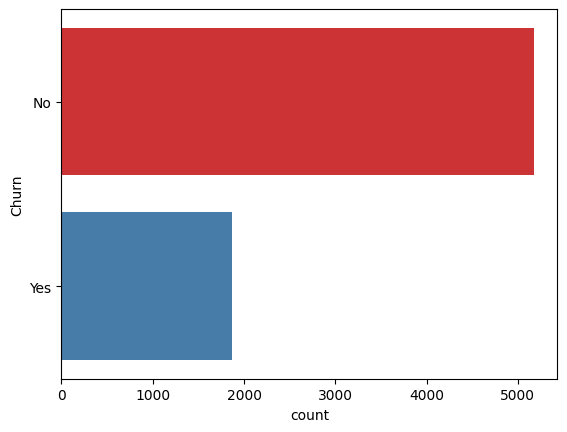

In [9]:
sns.countplot(df['Churn'], color='red', palette='Set1')

Visualisasi kasar dari data, untuk melihat proporsi pelanggan yang masih stay dan telah menjadi "Churn"

In [10]:
 #persentase kustomer yang churn
 num_retainded = df[df.Churn == 'No'].shape[0]
 num_churn = df[df.Churn == 'Yes'].shape[0]

 #melihat persentase kustomer yang stay
 print(num_retainded / (num_retainded + num_churn)*100, '% Tetap')

 #melihat persentase kustomer yang churn
 print(num_churn / (num_retainded + num_churn)*100, '% Meninggalkan')

73.4630129206304 % Tetap
26.536987079369588 % Meninggalkan


Persentase pelangaan yang stay dan yang sudah tak lagi menjadi pelanggan perusahaan telco di data(Churn)

<Axes: xlabel='gender', ylabel='count'>

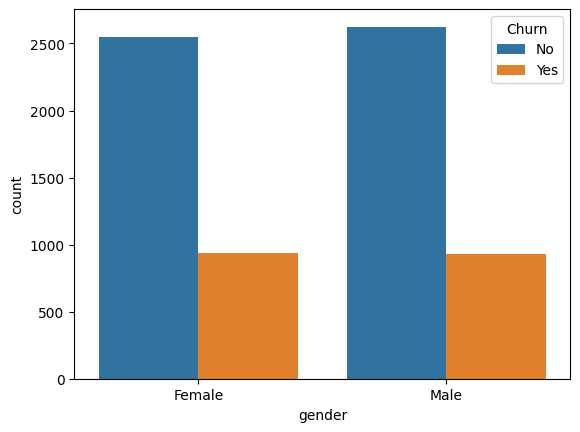

In [11]:
 #visalisasi jumlah churn di laki-laki dan permepuan
 sns.countplot(x= 'gender', hue='Churn', data=df)

Tidak ada hal yang menarik dari data ini karena jumlah laki laki dan perempuan yang menjadi churn tidak bisa dikatakan setara sehingga tidak ada *insight* yang bisa kita ambil dari variabel "Gender"

<Axes: xlabel='InternetService', ylabel='count'>

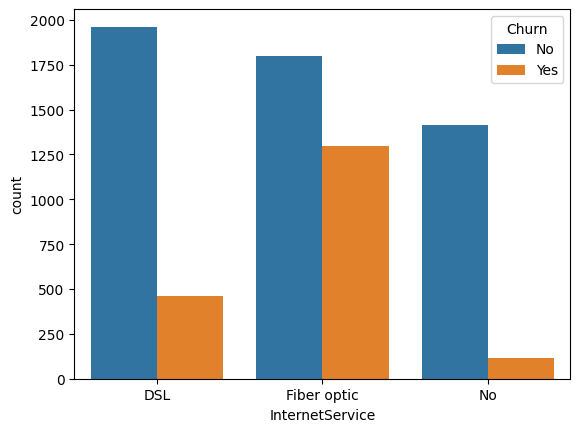

In [12]:
sns.countplot(x= 'InternetService', hue='Churn', data=df)

Nah di data ini kita mendapatkan 1 *insight* yaitu penggunal layanan internet "Fiber optic Internet Service" banyak yang menjadi "Churn" singga mungkin bisa dievaluasi apakah layanan Fiber Optic Intervet Service perusahaan telco pada data ini memberikan pelayan yang baik atau ada kompetitor perusahaan telco lain yang lebih baik dalam layanan "Fiber Optic Internet Services"

<Axes: xlabel='Contract', ylabel='count'>

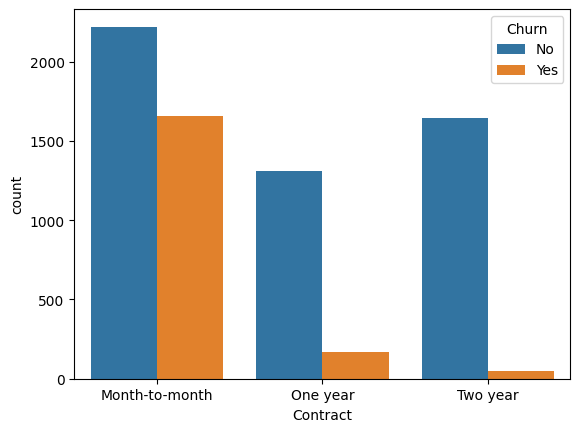

In [13]:
sns.countplot(x= 'Contract', hue='Churn', data=df)

Kita juga mendapatkan *insight* dalam visulisai kolom "Contract". Berdasarkan visualisasi ini bisa kita lihat bahwa pelangggan yang kontrak nya satu tahun dan dua tahun jarang menjadi "Churn" berbanding terbalik dengan tipe contract "Month to Month"

<Axes: xlabel='PaymentMethod', ylabel='count'>

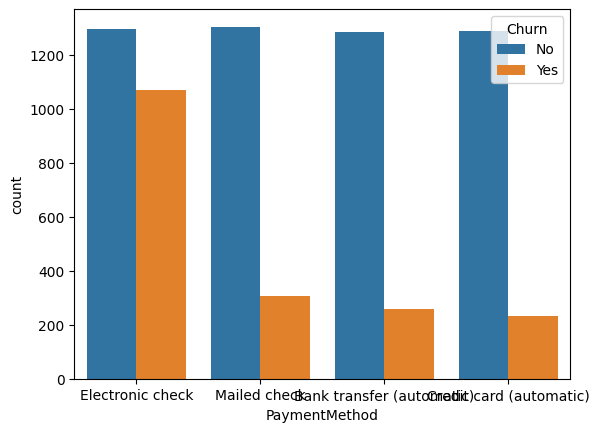

In [14]:
sns.countplot(x= 'PaymentMethod', hue='Churn', data=df)

Tipe pembayaran Elextronic Check lebih banyak yang menjadi "churn" sehingga bisa di evaluasi untuk metode pembayaran ini apakah ada masalah sehingga pelanggan yang menggunakan sistem pembayaran "Electronic Checl" banyak meninggalkan business ini

Text(0, 0.5, 'Number of Customers')

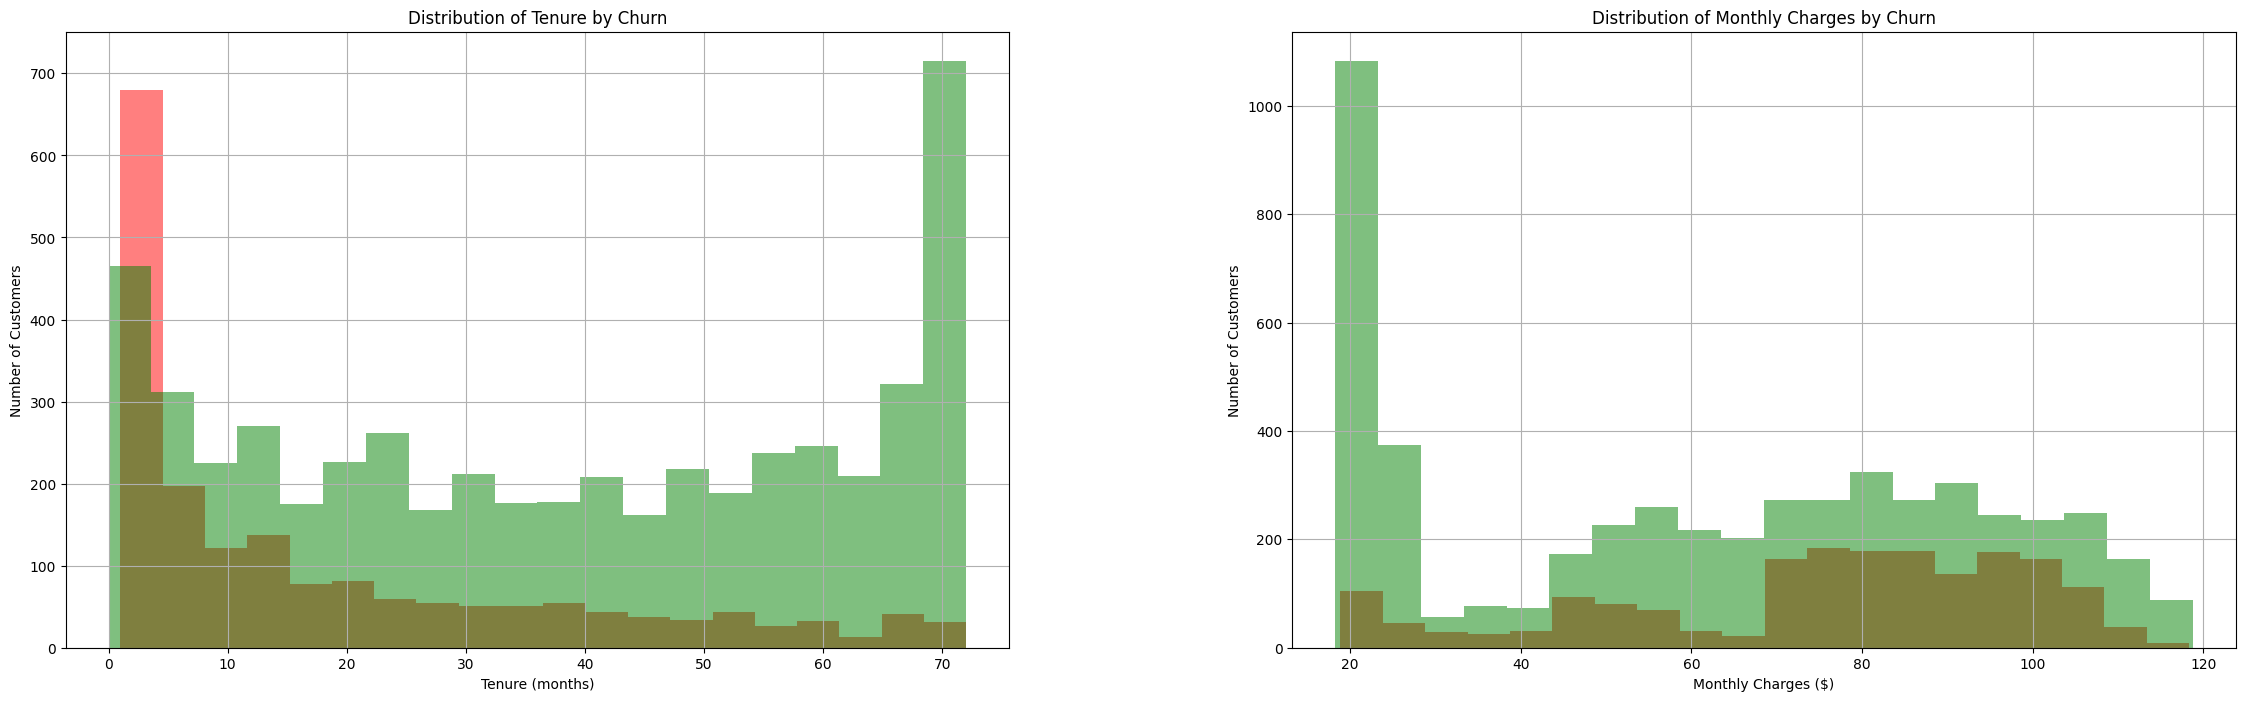

In [15]:
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax)
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='green', alpha=0.5, ax=ax)

# Menambahkan judul dan label untuk sumbu x dan y
ax[0].set_title('Distribution of Tenure by Churn')
ax[0].set_xlabel('Tenure (months)')
ax[0].set_ylabel('Number of Customers')

ax[1].set_title('Distribution of Monthly Charges by Churn')
ax[1].set_xlabel('Monthly Charges ($)')
ax[1].set_ylabel('Number of Customers')

# Pre-Processing

In [16]:
df.shape

(7043, 21)

In [19]:
df.shape

(7043, 20)

Kolom Customer ID dihapus dikarenakan tidak akan berpengaruh spesifik pada analisis ini

In [25]:
#kita ubah namanya menjadi cleaned_data
cleaned_data = df

In [24]:
cleaned_data.shape

(7043, 20)

In [26]:
#konversi semua kolom yang non numerik ke numerik
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == np.number: continue
    # print(df[column].unique())
    cleaned_data[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-26-9b989c454b42>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_data[column].dtype == np.number: continue
<ipython-input-26-9b989c454b42>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_data[column].dtype == np.number: continue
<ipython-input-26-9b989c454b42>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_data[column].dtype == np.number: continue
<ipython-input-26-9b989c454b42>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_data[column].dtype == np.number: continue
<ipython-input-26-9b989c454b42>:3: Depre

***kita ubah data non-numerik menjadi numerik atau data biner(0,1) contohnya kolom "Yes" yang tadinya "YES" menjadi 1 dan "No" menjadi 0 ***





In [27]:
cleaned_data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [28]:
cleaned_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [31]:
#scaled the data
x = cleaned_data.drop('Churn', axis=1)
y = cleaned_data['Churn']

X = StandardScaler().fit_transform(x)

In [32]:
#split data 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# buat model nya

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Kita menggunakan Regresi Logistik untuk memprediksi jumlah pelanggan yang akan menjadi "Churn" berdasarkan data yang ada

In [34]:
predictions = model.predict(X_test)

print(predictions)

[1 0 0 ... 0 1 0]


In [35]:
#uji presisi,recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.54      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

